# Haar System

In [2]:
import numpy as np

def approximation(array):
    return array[:array.shape[0]//2]

def details(array):
    return array[array.shape[0]//2:]

root2 = np.sqrt(2)
s = np.array([32, 32, 16, 8, 24, 16, 64, 32])

# matriz = np.array([[32, 8, 4, 2],
#                    [16, 0, 2, 4],
#                    [8, 4, 8, 0],
#                    [64, 2, 8, 16]])

# matriz = np.array([[ 74,  68, 100, 112,   8, 120],
#                    [168, 114, 116,  44,  56, 116],
#                    [194,  98, 104,  50,  66,  78],
#                    [ 48,  58, 186,  66, 114, 156],
#                    [200, 104, 194,  88, 104, 144],
#                    [176, 130, 182, 188,  80, 102]])


# 1 dimension

## Decomposition 

In [3]:
def direct_wavelet(array,output):
    N, N2, = array.shape[0], array.shape[0] // 2
    for i in range(0,N,2):
        output[int(i/2)] = (array[i] + array[i+1])/root2
        output[int(i/2 + N2)] = (array[i] - array[i+1])/root2
    return output

def inverse_wavelet(output,signal):
    N, N2,  = output.shape[0], output.shape[0] // 2
    for i in range(0,N,2):
        signal[i] = (output[int(i/2)] + output[int(i/2 + N2)])/root2
        signal[i+1] = (output[int(i/2)] - output[int(i/2 + N2)])/root2
    return signal


In [4]:
# DIRECT WAVELET TRANSFORM --> dwt
dwt = np.empty(len(s))
dwt = direct_wavelet(s,dwt)
print("\nApproximation coefficients (A1):", approximation(dwt))
print("Detail coefficients (D1):", details(dwt))

dwt2 = np.empty(len(approximation(dwt)))
dwt2 = direct_wavelet(approximation(dwt),dwt2)
print("\nApproximation coefficients (A2):", approximation(dwt2))
print("Detail coefficients (D2):", details(dwt2))


dwt3 = np.empty(len(approximation(dwt2)))
dwt3 = direct_wavelet(approximation(dwt2),dwt3)
print("\nApproximation coefficients (A3):", approximation(dwt3))
print("Detail coefficients (D3):", details(dwt3))


Approximation coefficients (A1): [45.254834   16.97056275 28.28427125 67.88225099]
Detail coefficients (D1): [ 0.          5.65685425  5.65685425 22.627417  ]

Approximation coefficients (A2): [44. 68.]
Detail coefficients (D2): [ 20. -28.]

Approximation coefficients (A3): [79.19595949]
Detail coefficients (D3): [-16.97056275]


## Reconstruction

In [5]:
# INVERSE WAVELET TRANSFORM
print("\nApproximation coefficients (A3):", approximation(dwt3))

rest_s2 = np.empty(2*len(approximation(dwt3)))
rest_s2 = inverse_wavelet(dwt3,rest_s2)
print("\nReconstructed Signal A2:", rest_s2)

rest_s1 = np.empty(2*len(approximation(dwt2)))
rest_s1 = inverse_wavelet(dwt2,rest_s1)
print("\nReconstructed Signal A1:", rest_s1)

rest_s = np.empty(2*len(approximation(dwt)))
rest_s = inverse_wavelet(dwt,rest_s)
print("\nReconstructed Signal:", rest_s)
print("Original Signal:", s)


Approximation coefficients (A3): [79.19595949]

Reconstructed Signal A2: [44. 68.]

Reconstructed Signal A1: [45.254834   16.97056275 28.28427125 67.88225099]

Reconstructed Signal: [32. 32. 16.  8. 24. 16. 64. 32.]
Original Signal: [32 32 16  8 24 16 64 32]


# 2 dimensions

## Decomposition

In [102]:
def split_matrix(matrix): # divide the matrix into 4 quadrants
    leftSide, rightSide = np.split(matrix, 2, axis=1)
    appr, hD = np.split(leftSide, 2, axis=0)
    vD, dD = np.split(rightSide, 2, axis=0)
    
    return appr, vD, hD, dD


def direct_wavelet2D_H(matrix): # does the direct wavelet transform horizontally
    Nf,N2,output = matrix.shape[0], matrix.shape[0]//2 ,np.zeros_like(matrix,dtype=float)
    for c in range(0, Nf, 2):
        output[:, c//2] = (matrix[:, c] + matrix[:, c+1]) / root2 
        output[:, c//2 + N2] = (matrix[:, c] - matrix[:, c+1]) / root2
    return output

def direct_wavelet2D_V(matrix): # does the direct wavelet transform vertically
    Nf,N2,output = matrix.shape[0], matrix.shape[0]//2, np.copy(matrix)
    for f in range(0, Nf, 2):
        output[f // 2, :N2] = (matrix[f, :N2] + matrix[f + 1, :N2]) / root2
        output[f//2 + N2, :N2] = (matrix[f, :N2] - matrix[f + 1, :N2]) / root2
    return output

In [104]:
matriz = np.random.randint(low=1, high=101, size=(4, 4)) * 2

# DIRECT WAVELET TRANSFORM
result = direct_wavelet2D_V(direct_wavelet2D_H(matriz))
# result = direct_wavelet2D_V(matriz)

print("\nOriginal Signal:\n", matriz)
print("\nDirect wevelet Matrix\n",result)

cA, cV, cH, cD = split_matrix(result)

# print("\nApproximation coefficients (A1):\n", cA)
# print("\nDetail coefficients (D1)")
# print(f"Horizontal Details (cH):\n{cH}\n")
# print(f"Vertical Details (cV):\n{cV}\n")
# print(f"Diagonal Details (cD):\n{cD}\n")


Original Signal:
 [[148  78  62 132]
 [ 78  46  38 144]
 [176 134   8  18]
 [100 190 158 194]]

Direct wevelet Matrix
 [[ 175.          188.           49.49747468  -49.49747468]
 [ 300.          189.           22.627417    -74.95331881]
 [  51.            6.           29.69848481   -7.07106781]
 [  10.         -163.          -63.63961031  -25.45584412]]


## Reconstriction

In [105]:
def inverse_wavelet2D_H(matrix):
    Nf, N2 = matrix.shape[1], matrix.shape[1]//2
    output = np.zeros_like(matrix, dtype=float)
    for c in range(N2):
        output[:, c*2] = (matrix[:, c] + matrix[:, c+N2]) / root2
        output[:, c*2+1] = (matrix[:, c] - matrix[:, c+N2]) / root2
    return output

def inverse_wavelet2D_V(matrix):
    N2, Nf = matrix.shape[0]//2, matrix.shape[0]
    output = np.copy(matrix)
    for f in range(N2):
        output[f*2, :N2] = (matrix[f, :N2] + matrix[f+N2, :N2]) / root2
        output[f*2+1, :N2] = (matrix[f, :N2] - matrix[f+N2, :N2]) / root2
    return output

In [106]:
# INVERSE WAVELET TRANSFORM
reconstructed_matriz = np.zeros_like(result, dtype=float)
reconstructed_matriz = inverse_wavelet2D_H(inverse_wavelet2D_V(result))
print("\nReconstructed Signal:\n", reconstructed_matriz)
print("\nDiference between Reconstructed and Original:\n",  np.round((reconstructed_matriz - matriz), 8))


Reconstructed Signal:
 [[148.  78.  62. 132.]
 [ 78.  46.  38. 144.]
 [176. 134.   8.  18.]
 [100. 190. 158. 194.]]

Diference between Reconstructed and Original:
 [[-0. -0. -0. -0.]
 [-0. -0. -0. -0.]
 [-0. -0.  0.  0.]
 [-0. -0. -0.  0.]]


## Example with an Image

In [89]:
import cv2
import IPython
import matplotlib.pyplot as plt


def imshow(img):
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

def p_new(matrix):
    matrix = 2

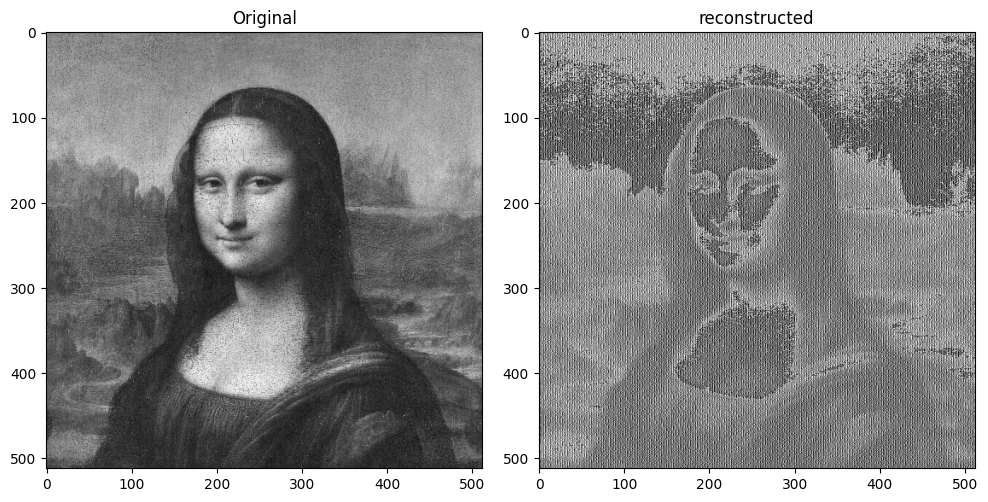

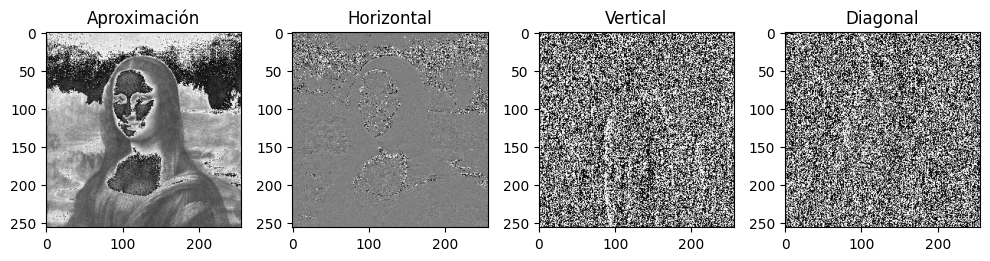

In [107]:
imgOr = cv2.imread(('image_color.jpg'), cv2.IMREAD_GRAYSCALE)
imgOr = np.array(imgOr)

# DIRECT WAVELET TRANSFORM 
result_data = direct_wavelet2D_V(direct_wavelet2D_H(imgOr))
leftSide, rightSide = np.split(result_data, 2, axis=1)

cA, cV, cH, cD = split_matrix(result_data)

reconstructed = inverse_wavelet2D_H(inverse_wavelet2D_V(result_data))

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(imgOr, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(reconstructed, cmap='gray')
axes[1].set_title('reconstructed')

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 4, figsize=(10, 10))
axes[0].imshow(cA, cmap='gray')
axes[0].set_title('Aproximación')
axes[1].imshow(cH, cmap='gray')
axes[1].set_title('Horizontal')
axes[2].imshow(cV, cmap='gray')
axes[2].set_title('Vertical')
axes[3].imshow(cD, cmap='gray')
axes[3].set_title('Diagonal')

plt.tight_layout()
plt.show()